In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  RS


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RS,RS,RS,RS,RS
Date,,,,,
2015-01-02,49.005566,49.603778,48.487117,49.029496,566800
2015-01-05,46.038418,48.295671,45.926752,48.295671,1060600
2015-01-06,45.815098,46.333550,45.113197,46.205931,907700
2015-01-07,45.240803,46.181990,45.113184,45.910801,944200
2015-01-08,45.823067,46.038424,45.264735,45.543899,881500


In [17]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, RS)   2744 non-null   float64
 1   (High, RS)    2744 non-null   float64
 2   (Low, RS)     2744 non-null   float64
 3   (Open, RS)    2744 non-null   float64
 4   (Volume, RS)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [18]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [19]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [20]:
pred1[0]

254.54920648698416

In [21]:
print(y_test)

Date
2023-09-25    251.214798
2023-09-26    254.140381
2023-09-27    253.319702
2023-09-28    253.194183
2023-09-29    251.041061
                 ...    
2025-11-20    275.140015
2025-11-21    273.339996
2025-11-24    279.679993
2025-11-25    280.589996
2025-11-26    279.320007
Name: Target, Length: 547, dtype: float64


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  35.35592560142278
Root Mean Squared Error:  5.946084896923587
R2 Score:  0.9035325280209747


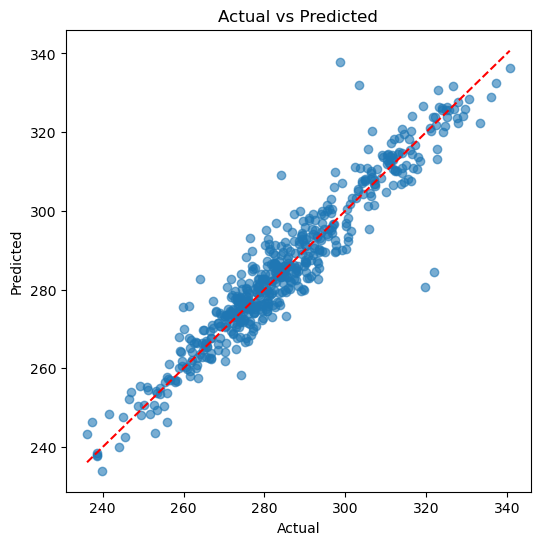

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [24]:
import joblib 
joblib.dump(lr, "RS.pkl")
model = joblib.load("RS.pkl")